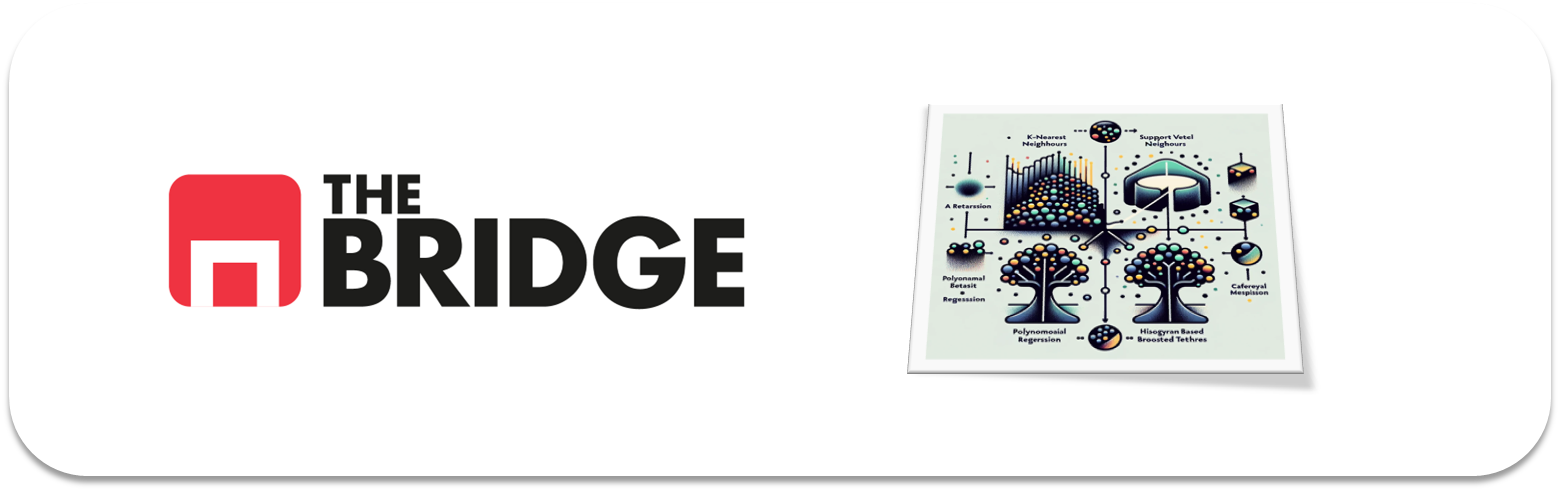

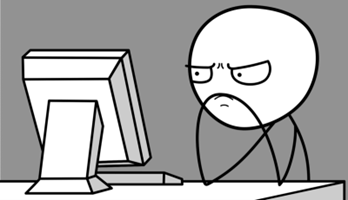

Para ejercitarte y afianzar lo aprendido sobre **Etapas Adicionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

### #1 Equilibrado de Datasets

### Ejercicio 1

Carga el dataset de los diamantes (está en el directorio "data") preparado ya para poder entrenar un modelo de clasificación. Muestra las primeras 7 filas y observa el listado de columnas. Muestra la distribución del potencial target ("cut") que ya conoces. ¿Está desbalanceada?


✅ Dataset cargado correctamente.

📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  int64  
 9   color_E       53940 non-null  int64  
 10  color_F       53940 non-null  int64  
 11  color_G       53940 non-null  int64  
 12  color_H       53940 non-null  int64  
 13  color_I       53940 non-null  int64  
 14  color_J       53940 non-null  int64  
 15  clarity_IF    53940 non-null  int64  
 16  clarity_VVS1  53940 non-null  int64  
 17  clarity

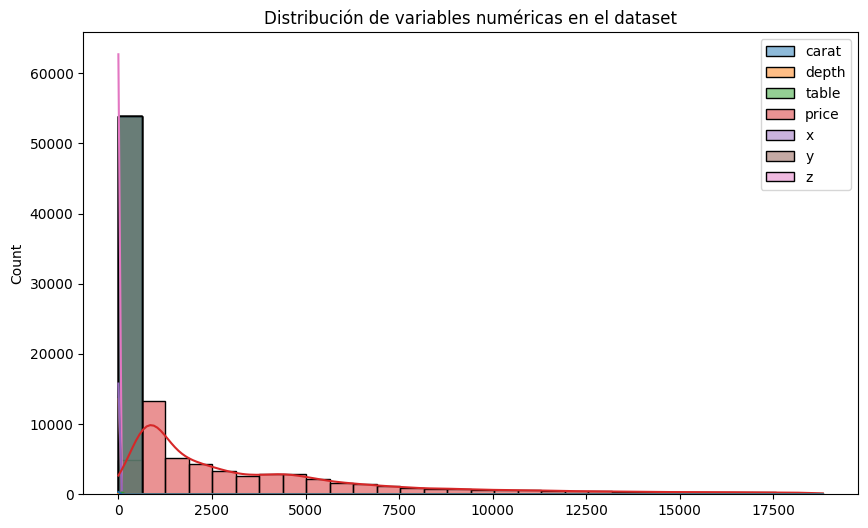

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ruta del archivo CSV (ajústala según la ubicación real)
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\diamonds_preparado.csv"

# Cargar el dataset con el delimitador correcto
try:
    data = pd.read_csv(dataset_path, delimiter="|", encoding="utf-8")
    print("\n✅ Dataset cargado correctamente.")
except Exception as e:
    print(f"\n❌ Error al cargar el dataset: {e}")

# Mostrar información general del dataset
print("\n📌 Información del dataset:")
print(data.info())

# Mostrar las primeras filas del dataset
print("\n🔍 Primeras filas del dataset:")
print(data.head())

# Mostrar nombres de las columnas
print("\n📌 Columnas del dataset:")
print(data.columns.tolist())

# Verificar valores nulos en el dataset
print("\n⚠ Valores nulos por columna:")
print(data.isnull().sum())

# Convertir las columnas numéricas correctamente
numeric_columns = ["carat", "depth", "table", "price", "x", "y", "z"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Mostrar estadísticas generales de las columnas numéricas
print("\n📊 Estadísticas descriptivas:")
print(data.describe())

# Visualizar la distribución de algunas variables clave
plt.figure(figsize=(10, 6))
sns.histplot(data=data[numeric_columns].dropna(), bins=30, kde=True)
plt.title("Distribución de variables numéricas en el dataset")
plt.show()


 ### Ejercicio 2

 Crea un train_set y un test_set al 20%, crea los pares X,y de train y test con el target en la variable "cut", considera el resto como features.

In [5]:


# Ruta del archivo CSV (ajústala según la ubicación real)
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\diamonds_preparado.csv"

# Cargar el dataset con el delimitador correcto
try:
    data = pd.read_csv(dataset_path, delimiter="|", encoding="utf-8")
    print("\nDataset cargado correctamente.")
except Exception as e:
    print(f"\nError al cargar el dataset: {e}")

# Mostrar nombres de las columnas para verificar que "cut" está presente
print("\nColumnas del dataset:")
print(data.columns.tolist())

# Definir variables X (features) e y (target, que es "cut")
if "cut" in data.columns:
    X = data.drop(columns=["cut"])  # Features (todas las columnas excepto cut)
    y = data["cut"]  # Target (cut)
else:
    print("Error: La columna 'cut' no se encuentra en el dataset.")
    exit()

# Convertir la variable objetivo "cut" en valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el dataset en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Mostrar tamaños de los conjuntos
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

# Verificar distribución de clases en train y test
print("\nDistribución de clases en Train:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nDistribución de clases en Test:")
print(pd.Series(y_test).value_counts(normalize=True))



Dataset cargado correctamente.

Columnas del dataset:
['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1']

Tamaño del conjunto de entrenamiento: 43152 filas
Tamaño del conjunto de prueba: 10788 filas

Distribución de clases en Train:
2    0.399541
3    0.255678
4    0.223976
1    0.090958
0    0.029848
Name: proportion, dtype: float64

Distribución de clases en Test:
2    0.399518
3    0.255654
4    0.224045
1    0.090934
0    0.029848
Name: proportion, dtype: float64


### Ejercicio 3

Instancia un modelo RandomForest con max_depth a 5 y sin tocar otro hiperparámetro, entrénalo con el X_train y el y_train. Y muestra el classification_report para el X_train.

In [8]:


# Importar las librerías necesarias

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Verificar que X_train e y_train existen antes de ejecutar
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: No se han definido X_train e y_train. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Instanciar el modelo RandomForest con max_depth=5
rf_model = RandomForestClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train)

# Mostrar el classification_report
print("\nClassification Report para X_train:")
print(classification_report(y_train, y_train_pred))



Classification Report para X_train:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1288
           1       0.78      0.39      0.52      3925
           2       0.78      0.94      0.86     17241
           3       0.59      0.87      0.70     11033
           4       0.65      0.21      0.32      9665

    accuracy                           0.70     43152
   macro avg       0.74      0.62      0.63     43152
weighted avg       0.71      0.70      0.66     43152



### Ejercicio 4

Dado el desbalanceo, nos queremos fijar en el recall medio (la media del recall considerando cada clase). Usando "cross_val_score", hagamos una estimación un poco más precisa (y en general pesimista) de cual sería ese recall medio del modelo en general. Asigna para ello a `scoring` el valor `balanced_accuracy`

In [9]:
# Importar librerías necesarias 
from sklearn.model_selection import cross_val_score

# Verificar que el modelo ya ha sido entrenado
if 'rf_model' not in locals():
    print("Error: No se ha entrenado el modelo. Ejecuta el Ejercicio 3 primero.")
    exit()

# Calcular el recall medio usando cross_val_score con balanced_accuracy
recall_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="balanced_accuracy")

# Mostrar resultados
print("\nResultados de validación cruzada (Balanced Accuracy por fold):")
print(recall_scores)

# Mostrar la media del recall medio
print(f"\nBalanced Accuracy promedio: {recall_scores.mean():.4f}")



Resultados de validación cruzada (Balanced Accuracy por fold):
[0.58850197 0.5887461  0.6226982  0.60275057 0.61771371]

Balanced Accuracy promedio: 0.6041


### Ejercicio 5

El resultado obtenido en el ejercicio 4 es bueno o malo dependiendo de lo que "Negocio" nos diga. Supón que negocio nos dice que quiere como mínimo que cada clase tenga un 50% de recall (que al menos un 50% de cada clase de diamente se etiquete bien por el modelo). Viendo el report anterior seguro que ves que así no llegamos. Tenemos que hacer algo, ayudar al modelo a conseguir ese objetivo. ¿Cómo? Con las téncias de equilibrado. Empecemos por aumentar las clases minoritarias con SMOTE. 

Crea un X_train y un y_train balanceados aplicando SMOTE; muestra el reparto del y_train para ver que se ha balanceado en todas las clases

In [10]:
# Importar 
from imblearn.over_sampling import SMOTE

# Verificar que X_train e y_train existen
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: No se han definido X_train e y_train. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Mostrar el reparto de clases en el y_train balanceado
print("\nDistribución de clases en y_train después de SMOTE:")
print(pd.Series(y_train_balanced).value_counts())



Distribución de clases en y_train después de SMOTE:
3    17241
4    17241
0    17241
2    17241
1    17241
Name: count, dtype: int64


### Ejercicio 6

Entrena con el nuevo X,y y muestra los resultados del modelo así entrenado pero prediciendo contra el X_test creado en el ejercicio 2. Comenta el resultado. NOTA: En el caso de querer balancear con tecnicas de Oversampling y Undersampling, es interesante crear un set de validación adicional al de test y train, para no tener que usar el test como validación de los modelos.

In [11]:
# Importar 
from sklearn.metrics import classification_report

# Verificar que X_train_balanced e y_train_balanced existen
if 'X_train_balanced' not in locals() or 'y_train_balanced' not in locals():
    print("Error: No se han definido X_train_balanced e y_train_balanced. Asegúrate de ejecutar el Ejercicio 5 primero.")
    exit()

# Instanciar y entrenar un nuevo modelo RandomForest con max_depth=5
rf_model_balanced = RandomForestClassifier(max_depth=5, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones sobre el conjunto de prueba (X_test)
y_test_pred = rf_model_balanced.predict(X_test)

# Mostrar el classification_report para evaluar el desempeño en test
print("\nClassification Report para X_test:")
print(classification_report(y_test, y_test_pred))



Classification Report para X_test:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       322
           1       0.47      0.67      0.55       981
           2       0.79      0.93      0.85      4310
           3       0.60      0.81      0.69      2758
           4       0.65      0.07      0.12      2417

    accuracy                           0.68     10788
   macro avg       0.67      0.64      0.60     10788
weighted avg       0.68      0.68      0.62     10788



### Ejercicio 7

Prueba ahora a mejorar el modelo empleando el hiperparámetro class_weight. Reinstancia el modelo, entrenalo contra el X_train inicial y luego muestra el report contra el test. Comenta brevemente el resultado.

In [12]:
# Importar 
from sklearn.metrics import classification_report

# Verificar que X_train e y_train existen
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: No se han definido X_train e y_train. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Instanciar un nuevo modelo RandomForest con class_weight="balanced"
rf_model_weighted = RandomForestClassifier(max_depth=5, class_weight="balanced", random_state=42)

# Entrenar el modelo con el dataset original (sin SMOTE)
rf_model_weighted.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba (X_test)
y_test_pred_weighted = rf_model_weighted.predict(X_test)

# Mostrar el classification_report para evaluar el desempeño en test
print("\nClassification Report para X_test con class_weight='balanced':")
print(classification_report(y_test, y_test_pred_weighted))



Classification Report para X_test con class_weight='balanced':
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       322
           1       0.46      0.67      0.55       981
           2       0.78      0.93      0.85      4310
           3       0.60      0.80      0.69      2758
           4       0.58      0.06      0.11      2417

    accuracy                           0.68     10788
   macro avg       0.65      0.66      0.60     10788
weighted avg       0.66      0.68      0.61     10788



### Ejercicio 8

Para terminar con nuestros intentos de mejorar la clasificación "global", vamos a aplicar el bajomuestreo de las clases mayoritarias, aunque no tengamos muchas esperanzas puestas en ello. Para poder hacerlo vamos a usar la clase `RandomUnderSampler` de la biblioteca imblearn. Investiga un poco sobre su funcionamiento (pista es equivalente en su uso a la clase Smote) y crea un dataset con undersampling de forma que las clases estén equilibradas. Muestra las frecuencias del target. ¿Por qué no tenemos muchas expectativas, en este caso, sobre esta técnica? 

In [13]:
# Importar 
from imblearn.under_sampling import RandomUnderSampler

# Verificar que X_train e y_train existen
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: No se han definido X_train e y_train. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Aplicar RandomUnderSampler para reducir el tamaño de las clases mayoritarias
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Mostrar el reparto de clases en el y_train después del undersampling
print("\nDistribución de clases en y_train después de RandomUnderSampler:")
print(pd.Series(y_train_under).value_counts())




Distribución de clases en y_train después de RandomUnderSampler:
0    1288
1    1288
2    1288
3    1288
4    1288
Name: count, dtype: int64


### Ejercicio 9

Entrena, ahora con class_weight a None, un RandomForest como el inicial pero contra el train creado en el ejercicio 8, muestra su informe de clasificación sobre la predicción contra test y comenta el resultado.

In [14]:
# Verificar que X_train_under e y_train_under existen
if 'X_train_under' not in locals() or 'y_train_under' not in locals():
    print("Error: No se han definido X_train_under e y_train_under. Asegúrate de ejecutar el Ejercicio 8 primero.")
    exit()

# Instanciar un modelo RandomForest sin ajustar class_weight
rf_model_undersampled = RandomForestClassifier(max_depth=5, random_state=42, class_weight=None)

# Entrenar el modelo con los datos undersampled
rf_model_undersampled.fit(X_train_under, y_train_under)

# Hacer predicciones en el conjunto de prueba (X_test)
y_test_pred_under = rf_model_undersampled.predict(X_test)

# Mostrar el classification_report para evaluar el desempeño en test
print("\nClassification Report para X_test con modelo entrenado en el dataset undersampled:")
print(classification_report(y_test, y_test_pred_under))



Classification Report para X_test con modelo entrenado en el dataset undersampled:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       322
           1       0.51      0.69      0.59       981
           2       0.79      0.92      0.85      4310
           3       0.60      0.83      0.70      2758
           4       0.55      0.07      0.12      2417

    accuracy                           0.68     10788
   macro avg       0.66      0.67      0.62     10788
weighted avg       0.66      0.68      0.62     10788



### #2 Análisis de Errores

### Ejercicio 10

Muestra la matriz de confusión con "ConfusionMatrixDisplay.from_predictions" para el clasificador entrenado con el hiperparámetro class_weight con el valor "balanced" (el del ejercicio 7). Asigna el valor "true" (ojo es un string, no el booleano True) al argumento normalize. Comenta que estamos viendo y hacia donde se dirigen los errores de clasificación de "Very Good"

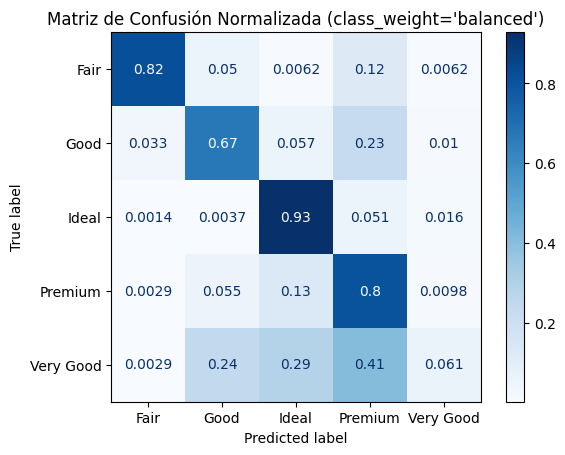

In [15]:
# Importar 
from sklearn.metrics import ConfusionMatrixDisplay

# Verificar que rf_model_weighted existe (modelo del ejercicio 7)
if 'rf_model_weighted' not in locals():
    print("Error: No se ha entrenado el modelo con class_weight='balanced'. Ejecuta el Ejercicio 7 primero.")
    exit()

# Verificar que X_test e y_test existen
if 'X_test' not in locals() or 'y_test' not in locals():
    print("Error: No se han definido X_test e y_test. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Hacer predicciones con el modelo entrenado en el Ejercicio 7
y_test_pred_weighted = rf_model_weighted.predict(X_test)

# Mostrar la matriz de confusión normalizada
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_weighted,
    normalize="true",  # Normalizar como string, no booleano
    display_labels=label_encoder.classes_,  # Usar las clases originales
    cmap="Blues"  # Escala de color
)
plt.title("Matriz de Confusión Normalizada (class_weight='balanced')")
plt.show()


### Ejercicio 11

Muestra ahora la matriz de confusión, empleando la misma función, pero esta vez enseñando los porcentajes de distribució de los errores en la predicción, para eso emplea normalize = "pred" como argumeto y date cuenta de que las columnas son las que ahora suman el 100%. Comenta el resultado respecto a "Premium" como predicción y a lo que se equivoca respecto a "Very Good". 

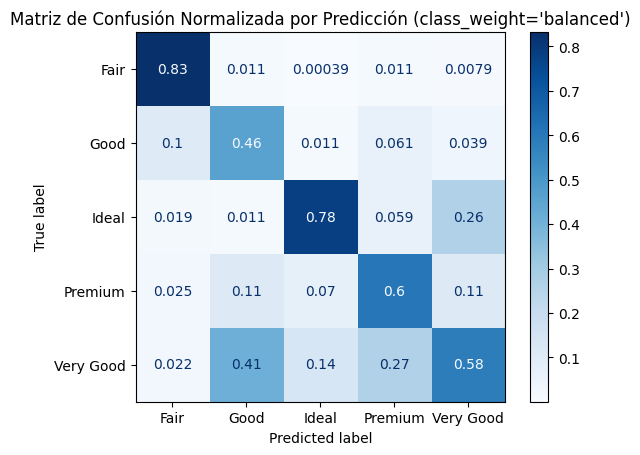

In [16]:
# Verificar que el modelo rf_model_weighted existe (modelo del Ejercicio 7)
if 'rf_model_weighted' not in locals():
    print("Error: No se ha entrenado el modelo con class_weight='balanced'. Ejecuta el Ejercicio 7 primero.")
    exit()

# Verificar que X_test e y_test existen
if 'X_test' not in locals() or 'y_test' not in locals():
    print("Error: No se han definido X_test e y_test. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Hacer predicciones con el modelo entrenado en el Ejercicio 7
y_test_pred_weighted = rf_model_weighted.predict(X_test)

# Mostrar la matriz de confusión normalizada por predicción (columnas suman 100%)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_weighted,
    normalize="pred",  # Normalización por columna
    display_labels=label_encoder.classes_,  # Usar las clases originales
    cmap="Blues"  # Escala de color
)
plt.title("Matriz de Confusión Normalizada por Predicción (class_weight='balanced')")
plt.show()


### Ejercicio 12

Dada la relación entre los errores de "Very Good" y "Prediction" que puedes haber observado en los ejercicios anteriores, una posible mejora es introducir un modelo que corrija esos errores, pero esa es la filosofía de los Gradient Boosted Trees. Provemos esa línea: Entrena un CatBoost con los hiperparámetros ajustados para que no emplee más de 5 niveles en sus árboles intermedios y para que balanceé las clases.

1. Obtener el "balanced_accuracy" primero con una validación cruzada.
2. Evaluálo después de contra el test.

In [17]:
# Importar solo las librerías necesarias
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, balanced_accuracy_score

# Verificar que X_train e y_train existen
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: No se han definido X_train e y_train. Asegúrate de ejecutar el Ejercicio 2 primero.")
    exit()

# Configurar el modelo CatBoostClassifier
catboost_model = CatBoostClassifier(
    depth=5,                   # Limitar la profundidad de los árboles
    auto_class_weights="Balanced",  # Balancear automáticamente las clases
    iterations=100,            # Reducir iteraciones para una ejecución rápida
    random_seed=42,
    verbose=0                  # Silenciar la salida de entrenamiento
)

# Validación cruzada para obtener balanced_accuracy
print("\nRealizando validación cruzada...")
cv_scores = cross_val_score(
    catboost_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring="balanced_accuracy"
)
print(f"\nBalanced Accuracy promedio en validación cruzada: {cv_scores.mean():.4f}")

# Entrenar el modelo completo con los datos de entrenamiento
print("\nEntrenando el modelo completo con el conjunto de entrenamiento...")
catboost_model.fit(X_train, y_train)

# Evaluar el modelo contra el conjunto de prueba
y_test_pred = catboost_model.predict(X_test)

# Mostrar resultados en el conjunto de prueba
print("\nBalanced Accuracy en el conjunto de prueba:")
print(f"{balanced_accuracy_score(y_test, y_test_pred):.4f}")

print("\nClassification Report en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))




Realizando validación cruzada...

Balanced Accuracy promedio en validación cruzada: 0.7700

Entrenando el modelo completo con el conjunto de entrenamiento...

Balanced Accuracy en el conjunto de prueba:
0.7798

Classification Report en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       322
           1       0.68      0.81      0.74       981
           2       0.84      0.89      0.86      4310
           3       0.75      0.80      0.77      2758
           4       0.67      0.48      0.56      2417

    accuracy                           0.77     10788
   macro avg       0.76      0.78      0.76     10788
weighted avg       0.76      0.77      0.76     10788

